In [1]:
#_________________ Applied Statistics 2024/2025 _______________________________

#### 4.1.Linear Mixed-effects models: ARMD Trial - Homoscedastic Residuals ####
#_____________________________________________________________________________#

In [2]:
library(nlmeU)
library(corrplot)
library(nlme)
library(lattice)
library(plot.matrix)
library(lme4)
library(insight)

rm(list=ls())
graphics.off()


Attaching package: 'nlmeU'


The following object is masked from 'package:stats':

    sigma


corrplot 0.95 loaded

Loading required package: Matrix


Attaching package: 'lme4'


The following object is masked from 'package:nlme':

    lmList




In [3]:
# Topics:
#   LINEAR MIXED MODELS WITH HOMOSCEDASTIC RESIDUALS
#   1. Linear Models with random intercept 
#   2. Linear Models with random intercept + slope 
#      2.A general structure of D
#      2.B diagonal D
#--> Interpretation of random effects and PVRE
#--> Diagnostic
#--> Models comparison 
#--> Tests for the random components

In [4]:
data(armd, package = "nlmeU") # Age-Related Macular Degeneration
rlims <- c(-4.5, 4.5)
xlims <- c(0, 90)  
xlimc <- c("4", "12", "24", "52wks")

In [5]:
## Linear Mixed-Effects models (LMM)
## In the LMM approach, the hierarchical structure of the data is directly addressed, 
## with random effects that describe the contribution of the variability at different levels 
## of the hierarchy to the total variability of the observations.

## Two main R packages: 
## 1. 'lme4' with lmer() --> it does not handle heteroscedastic residuals
## 2. 'nlme' with lme()  --> it handles heteroscedastic residuals

## --> We will mainly use lme() function in nlme package for LMM models;
## --> We will shift to lmer() function in lme4 package for LMM models with homoscedastic residuals (this script)
##     only for some visualizations

# LINEAR MIXED MODELS WITH HOMOSCEDASTIC RESIDUALS 

In [6]:
#___________________________________________________________________
#### Model 1. Random intercept, homoscedastic residuals (M16.1) ####

In [7]:
# We now treat time as a numeric variable (as assessed in the last lab)
lm2.form <- formula(visual ~ visual0 + time + treat.f + treat.f:time)

fm16.1 <- lme(lm2.form, random = ~1|subject, data = armd)
# By default, lme() assumes independent residual errors with a constant variance, sigma^2.
# The default REML estimation is used --> to change it to the ML estimation, put method="ML" 

summary(fm16.1)
# sigma*sqrt(d11) = 8.98 (standard deviation of the random intercepts)
# sigma = 8.63           (residual standard deviation)

Linear mixed-effects model fit by REML
  Data: armd 
       AIC      BIC    logLik
  6591.971 6625.286 -3288.986

Random effects:
 Formula: ~1 | subject
        (Intercept) Residual
StdDev:    8.978212 8.627514

Fixed effects:  list(lm2.form) 
                       Value Std.Error  DF   t-value p-value
(Intercept)         9.288078 2.6818888 631  3.463260  0.0006
visual0             0.826440 0.0446670 231 18.502244  0.0000
time               -0.212216 0.0229295 631 -9.255150  0.0000
treat.fActive      -2.422000 1.4999667 231 -1.614703  0.1077
time:treat.fActive -0.049591 0.0335617 631 -1.477594  0.1400
 Correlation: 
                   (Intr) visul0 time   trt.fA
visual0            -0.920                     
time               -0.185 -0.003              
treat.fActive      -0.295  0.022  0.335       
time:treat.fActive  0.126  0.002 -0.683 -0.476

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-4.18750513 -0.39692515  0.03204783  0.55

In [8]:
# print out the estimated fixed-effects table
printCoefmat(summary(fm16.1)$tTable, has.Pvalue = TRUE, P.values = TRUE) 
# Remember: t-test statistics for the fixed-effects coefficients (marginal-approach)

                        Value  Std.Error         DF t-value   p-value    
(Intercept)          9.288078   2.681889 631.000000  3.4633 0.0005698 ***
visual0              0.826440   0.044667 231.000000 18.5022 < 2.2e-16 ***
time                -0.212216   0.022929 631.000000 -9.2552 < 2.2e-16 ***
treat.fActive       -2.422000   1.499967 231.000000 -1.6147 0.1077402    
time:treat.fActive  -0.049591   0.033562 631.000000 -1.4776 0.1400155    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [9]:
# to get the confidence intervals of all the estimated parameters
intervals(fm16.1)

Approximate 95% confidence intervals

 Fixed effects:
                        lower        est.       upper
(Intercept)         4.0215712  9.28807837 14.55458553
visual0             0.7384331  0.82643987  0.91444668
time               -0.2572433 -0.21221595 -0.16718859
treat.fActive      -5.3773644 -2.42200012  0.53336420
time:treat.fActive -0.1154967 -0.04959058  0.01631559

 Random Effects:
  Level: subject 
                   lower     est.    upper
sd((Intercept)) 7.989302 8.978212 10.08953

 Within-group standard error:
   lower     est.    upper 
8.163495 8.627514 9.117909 

In [10]:
# Var-Cov matrix of fixed-effects
vcovb <- vcov(fm16.1) 
vcovb
# and Correlation of fixed effects
corb <- cov2cor(vcovb) 
nms <- abbreviate(names(fixef(fm16.1)), 5)
rownames(corb) <- nms
corb

,(Intercept),visual0,time,treat.fActive,time:treat.fActive
(Intercept),7.19252750,-1.102120e-01,-1.135793e-02,-1.186575434,1.137481e-02
visual0,-0.11021200,1.995141e-03,-2.950087e-06,0.001487695,2.644510e-06
time,-0.01135793,-2.950087e-06,5.257619e-04,0.011518692,-5.257615e-04
treat.fActive,-1.18657543,1.487695e-03,1.151869e-02,2.249900005,-2.394817e-02
time:treat.fActive,0.01137481,2.644510e-06,-5.257615e-04,-0.023948166,1.126389e-03


,(Intercept),visual0,time,treat.fActive,time:treat.fActive
(Int),1.0000000,-0.920028511,-0.184698686,-0.29496669,0.126374432
visl0,-0.9200285,1.000000000,-0.002880404,0.02220472,0.001764064
time,-0.1846987,-0.002880404,1.000000000,0.33490914,-0.683203483
trt.A,-0.2949667,0.022204722,0.334909142,1.00000000,-0.475714657
tm:.A,0.1263744,0.001764064,-0.683203483,-0.47571466,1.000000000


In [11]:
# Var-Cov matrix of random-effects and residuals (what we observe in the summary)
print(vc <- VarCorr(fm16.1), comp = c("Variance", "Std.Dev."))

VarCorr(fm16.1)

var_eps = as.numeric(vc[2,1])
var_eps

sd_eps <- summary(fm16.1)$sigma
sd_eps

var_b = as.numeric(vc[1,1])
var_b

subject = pdLogChol(1) 
            Variance StdDev  
(Intercept) 80.60829 8.978212
Residual    74.43401 8.627514


subject = pdLogChol(1) 
            Variance StdDev  
(Intercept) 80.60829 8.978212
Residual    74.43401 8.627514

[1] 74.43401

[1] 8.627514

[1] 80.60829

In [12]:
# Let's compute the conditional and marginal var-cov matrix of Y
#---------------------------------------------------------------#

In [ ]:
# --> Conditional variance-covariance matrix of Y given b (diagonal matrix) 
#     sigma^2 * Ri for the second subject (type='conditional')

getVarCov(fm16.1,                     
            type = "conditional"      # sigma^2 * R_i = 74.434 * I4
            ,individual = "2")   
# Conditioned to the random effects b_i --> var-cov of the errors are independent and homoscedastic

subject 2 
Conditional variance covariance matrix
       1      2      3      4
1 74.434  0.000  0.000  0.000
2  0.000 74.434  0.000  0.000
3  0.000  0.000 74.434  0.000
4  0.000  0.000  0.000 74.434
  Standard Deviations: 8.6275 8.6275 8.6275 8.6275 

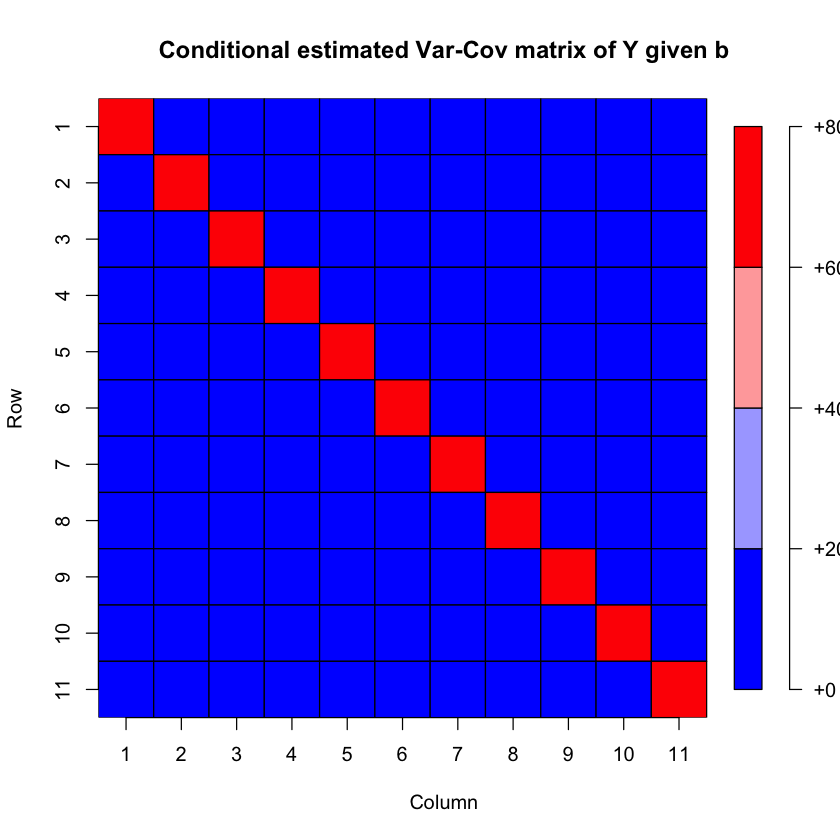

In [14]:
# we extract sigma^2 * Ri for patients i=2,3,4
sR = getVarCov(fm16.1, type = "conditional", individual = 2:4)
# and we plot them
par(bg = "white")
plot(as.matrix(bdiag(sR$`2`, sR$`3`, sR$`4`)), 
     col=colorRampPalette(c("blue", "white", "red")),
     main = 'Conditional estimated Var-Cov matrix of Y given b')

In [15]:
# --> the marginal variance-covariance matrix of Y (block-diagonal matrix)
#     sigma^2 * V_i for the second subject (type='marginal')
(sVi = getVarCov(fm16.1,                       
          type = "marginal",      # sigma^2 * V_i: sigma^2*d11 extra-diagonal and sigma^2+d11 on main diagonal
          individual = "2"))
(cov2cor(sVi[[1]]))               # Corr(sigma^2 * V_i) 

subject 2 
Marginal variance covariance matrix
        1       2       3       4
1 155.040  80.608  80.608  80.608
2  80.608 155.040  80.608  80.608
3  80.608  80.608 155.040  80.608
4  80.608  80.608  80.608 155.040
  Standard Deviations: 12.452 12.452 12.452 12.452 

,1,2,3,4
1,1.0000000,0.5199116,0.5199116,0.5199116
2,0.5199116,1.0000000,0.5199116,0.5199116
3,0.5199116,0.5199116,1.0000000,0.5199116
4,0.5199116,0.5199116,0.5199116,1.0000000


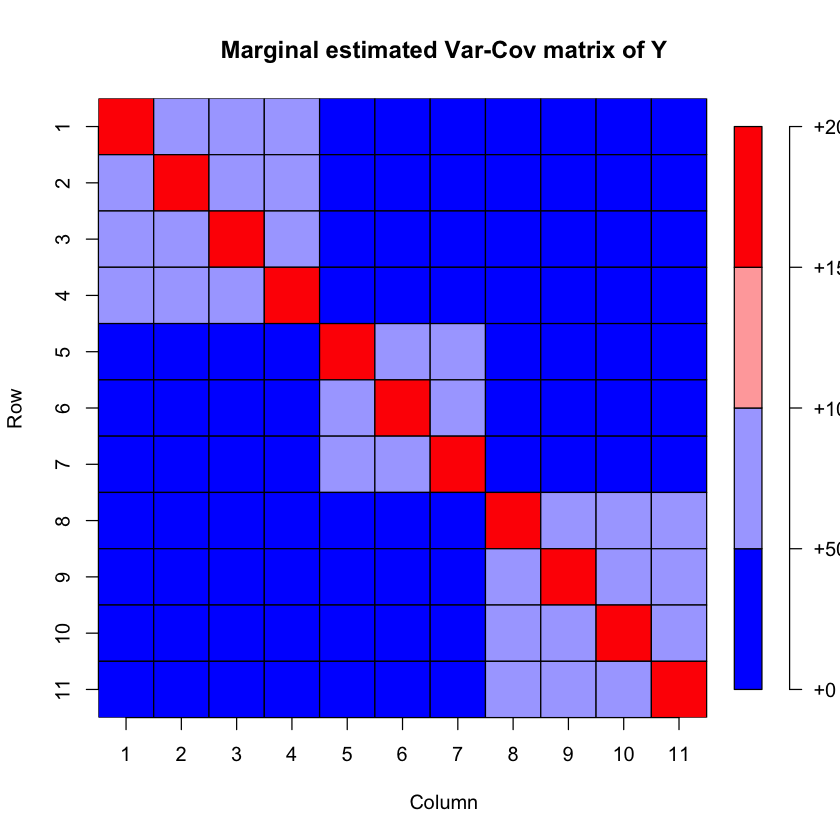

In [16]:
# we extract sigma^2 * V_i for patients i=2,3,4
sV <- getVarCov(fm16.1, type = "marginal", individual = 2:4) 
# visualization 
par(bg = "white")
plot(as.matrix(bdiag(sV$`2`, sV$`3`, sV$`4`)), #-> V is a block-diagional matrix, the marginal var-cov matrix
     col=colorRampPalette(c("blue", "white", "red")),
     main = 'Marginal estimated Var-Cov matrix of Y')

In [17]:
# PVRE 
#------#
# i.e. the Percentage of Variance explained by the Random Effect (PVRE).
# This is also called the intraclass correlation (ICC),
# because it is also an estimate of the within group correlation.

PVRE <- var_b/(var_b+var_eps)
PVRE # it is high!

[1] 0.5199116

In [18]:
# Visualization of confidence intervals
#--------------------------------------#
intervals(fm16.1)

Approximate 95% confidence intervals

 Fixed effects:
                        lower        est.       upper
(Intercept)         4.0215712  9.28807837 14.55458553
visual0             0.7384331  0.82643987  0.91444668
time               -0.2572433 -0.21221595 -0.16718859
treat.fActive      -5.3773644 -2.42200012  0.53336420
time:treat.fActive -0.1154967 -0.04959058  0.01631559

 Random Effects:
  Level: subject 
                   lower     est.    upper
sd((Intercept)) 7.989302 8.978212 10.08953

 Within-group standard error:
   lower     est.    upper 
8.163495 8.627514 9.117909 

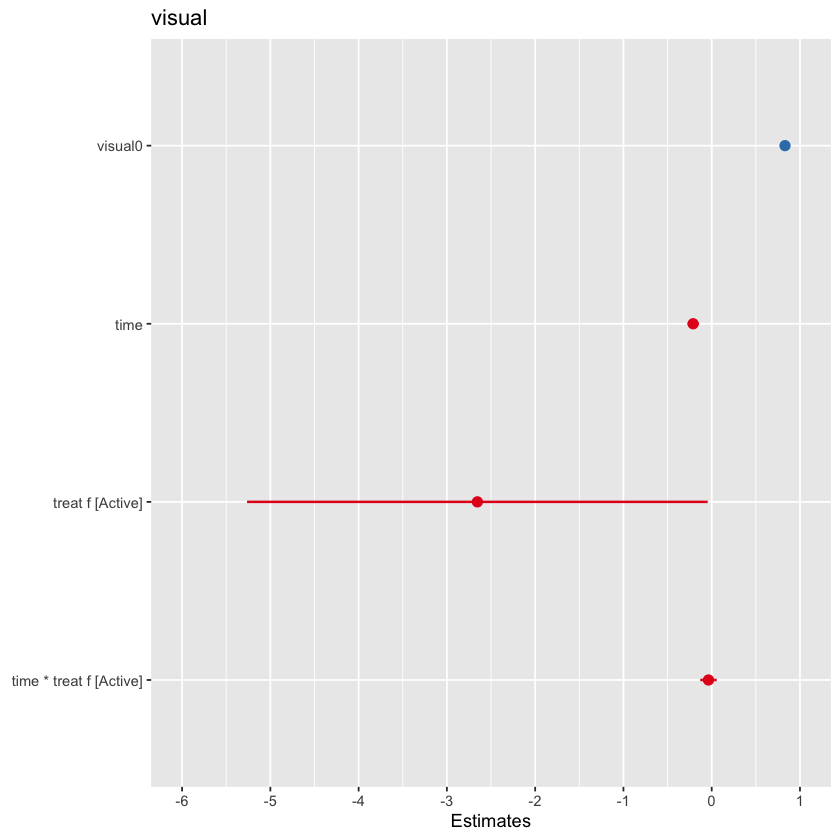

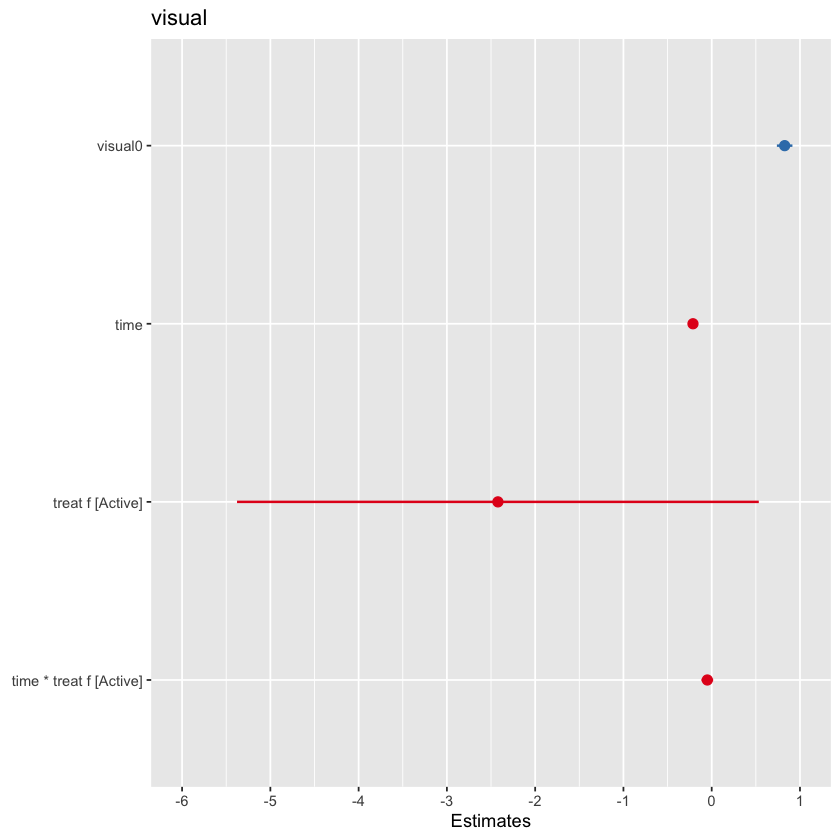

In [19]:
# fixed effects
# we plot the "classical" linear model for visualizing the fixed effects (without intercept)
fm16.1GLS <- gls(lm2.form, data = armd) 
library(sjPlot)
plot_model(fm16.1GLS)
plot_model(fm16.1)

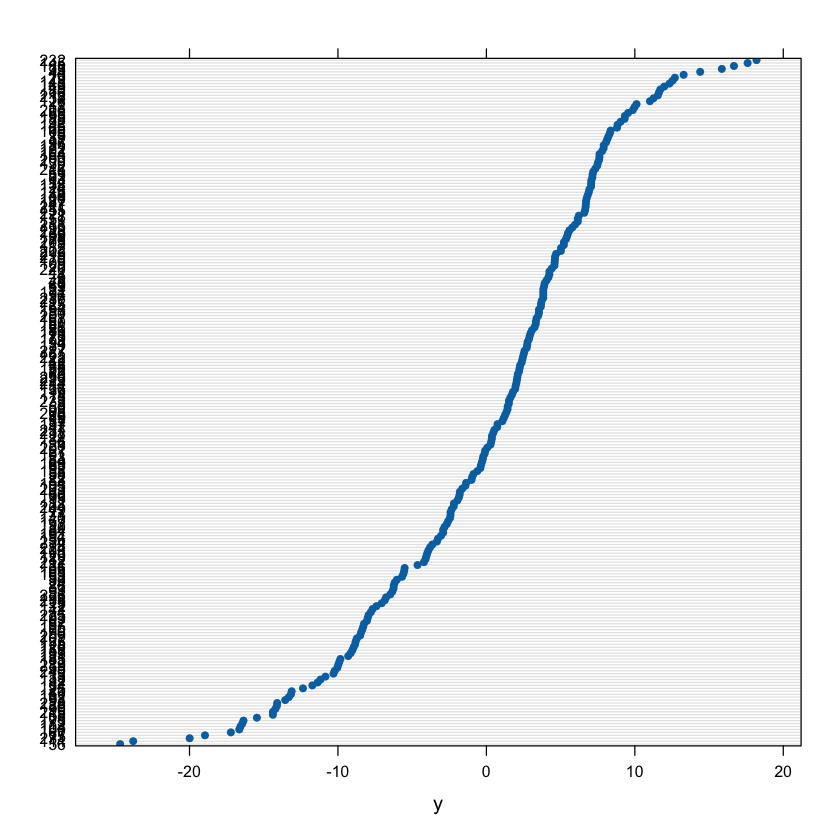

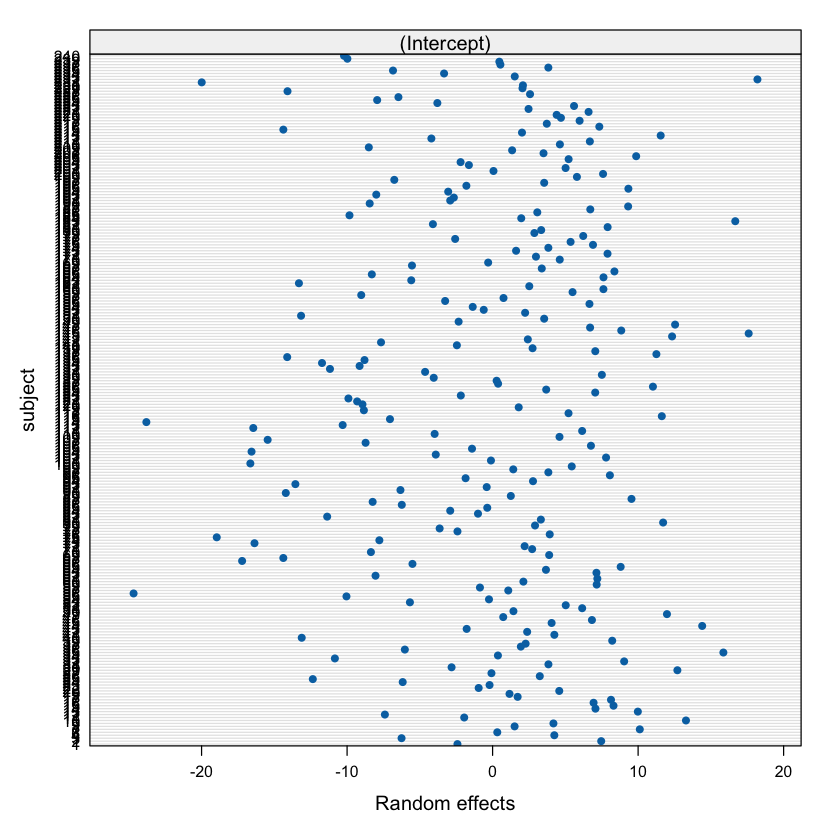

In [20]:
# random effects
## visualization of the random intercepts with their 95% confidence intervals
# Random effects: b_0i for i=1,...,234
re = ranef(fm16.1)
dat = data.frame(x= row.names(re),y=re[,attr(re,'effectName')])
# The dotplot shows the point and interval estimates for the random effects
# ordered
dotplot(reorder(x,y)~y,data=dat)
# not ordered
plot(ranef(fm16.1))

$subject


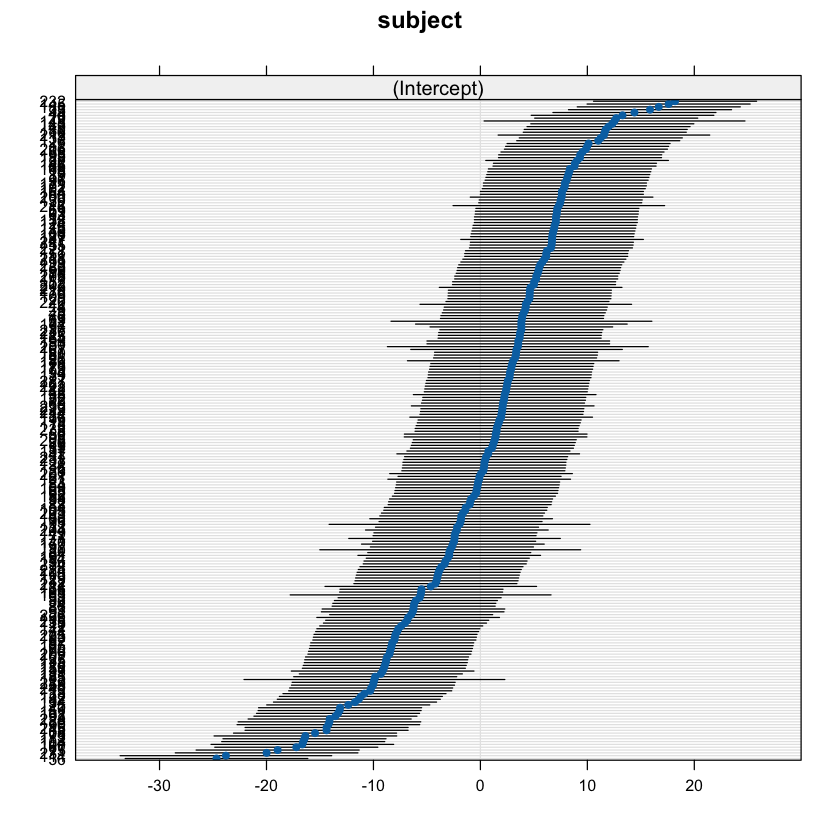

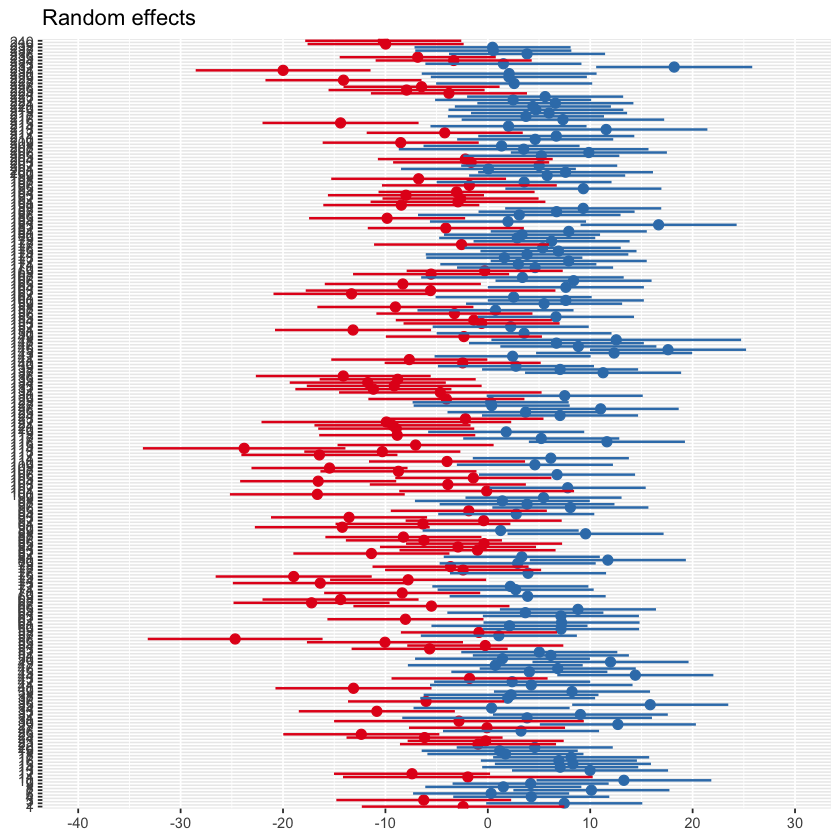

In [21]:
#_____________________________________________________________________________
# nicer visualization of the random effects with lmer() function
# formulation with lmer() for including a random intercept at subject level
fm16.1mer <- lmer(visual ~ visual0 + time * treat.f + (1|subject), data = armd)
# we can highligh which are significantly different from the mean (0)
# visualization of the random intercepts with their 95% confidence intervals
dotplot(ranef(fm16.1mer)) 

#install.packages('TMB', type = 'source')
plot_model(fm16.1mer, type='re') #--> positive (blu) and negative (red) effect
#_____________________________________________________________________________

In [22]:
#Test for (variance of) random intercept
#--------------------------------------#
# H0 is "variance of a random effect is 0 
#       in an LMM with a known correlation structure of the tested random effect and
#       independent and identically distributed random errors"
library(RLRsim)    
exactRLRT(fm16.1)        # M16.1 (alternative model) 
# The function simulates values of the REML-based LRtest statistic.

# The p-value of the REML-based LR test,
# estimated from 10,000 simulations (the default), 
# --> pval clearly indicates the importance of including the random intercepts into the model, 
#     needed to adjust for the correlation between visual acuity measurements.

# Because we test a random effect in model M16.1,
# which contains only a single random effect (only the intercept), 
# we use the abbreviated form of the function call, with model M16.1 as the only argument. 


	simulated finite sample distribution of RLRT.
	
	(p-value based on 10000 simulated values)

data:  
RLRT = 249.97, p-value < 2.2e-16


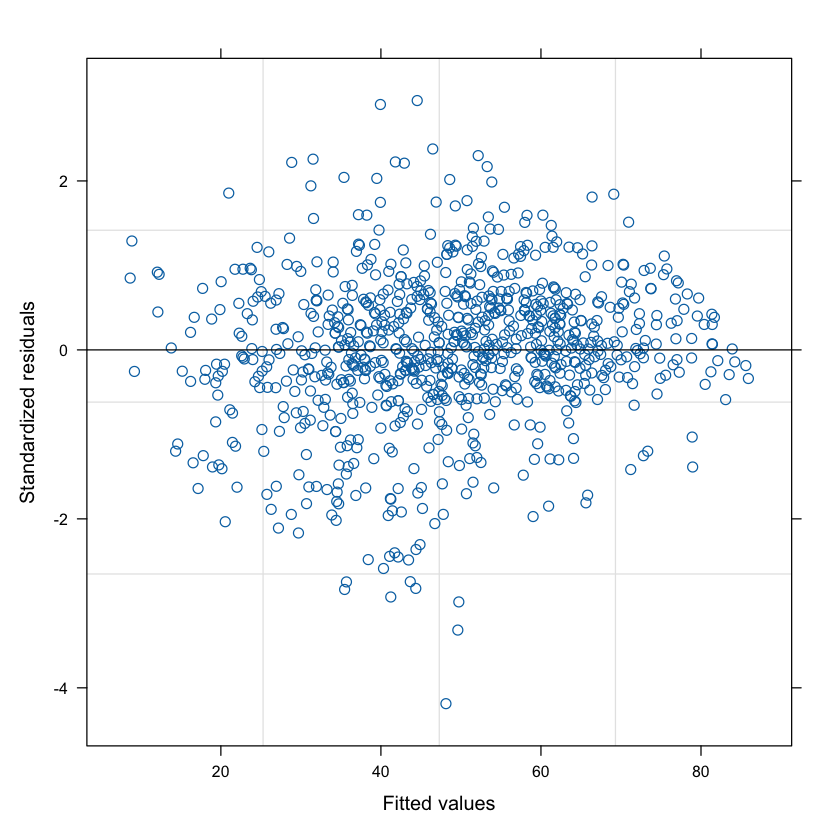

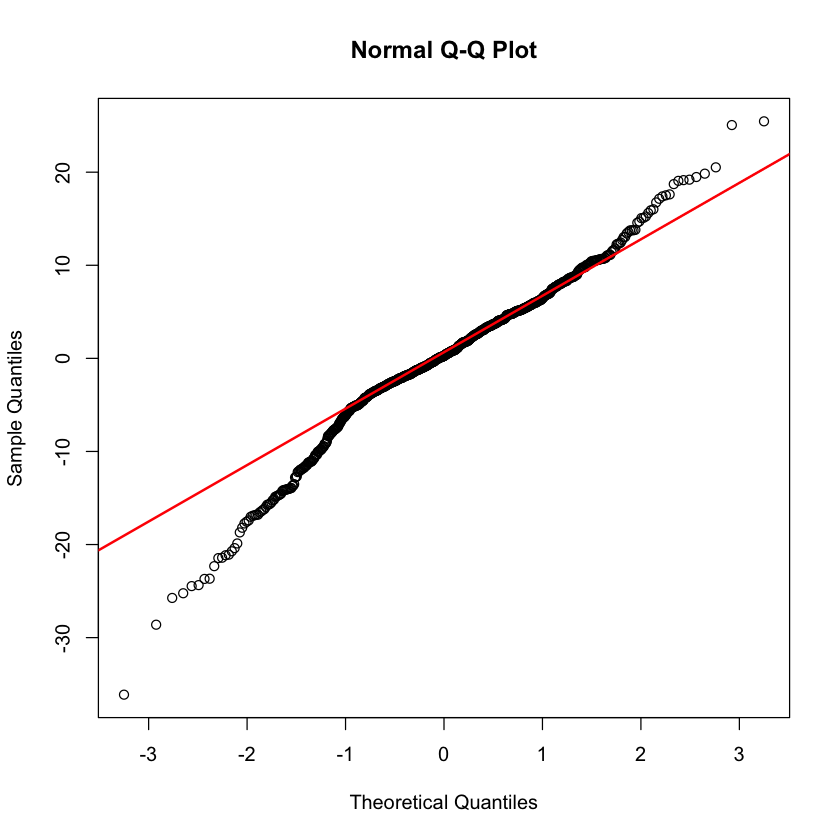

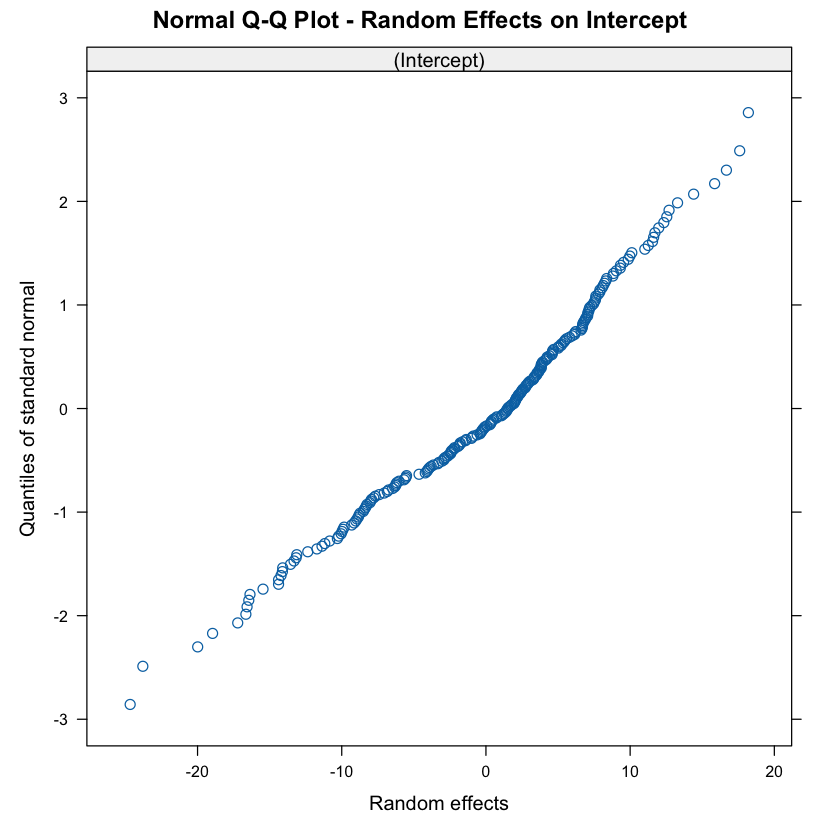

In [23]:
# Diagnostic plots 
#----------------#
# 1) Assessing Assumption on the within-group errors
plot(fm16.1)  # Pearson and raw residuals are the same now 
# (no scale is applied since we are dealing with homogeneous variance)
par(bg = "white")
qqnorm(resid(fm16.1)) # normality of the residuals
qqline(resid(fm16.1), col='red', lwd=2)

# 2) Assessing Assumption on the Random Effects
qqnorm(fm16.1, ~ranef(.), main='Normal Q-Q Plot - Random Effects on Intercept')

Linear mixed-effects model fit by REML
  Data: armd 
       AIC      BIC    logLik
  6453.824 6496.657 -3217.912

Random effects:
 Formula: ~1 + time | subject
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev    Corr  
(Intercept) 7.0666327 (Intr)
time        0.2729987 0.143 
Residual    6.7442472       

Fixed effects:  list(lm2.form) 
                       Value Std.Error  DF   t-value p-value
(Intercept)         4.768536 2.3195550 631  2.055798  0.0402
visual0             0.908896 0.0391891 231 23.192601  0.0000
time               -0.215285 0.0316627 631 -6.799343  0.0000
treat.fActive      -2.290098 1.1835442 231 -1.934949  0.0542
time:treat.fActive -0.056374 0.0462155 631 -1.219803  0.2230
 Correlation: 
                   (Intr) visul0 time   trt.fA
visual0            -0.934                     
time               -0.073  0.003              
treat.fActive      -0.274  0.026  0.138       
time:treat.fActive  0.050 -0.002 -0.685 -0.207

Standa

Approximate 95% confidence intervals

 Fixed effects:
                        lower        est.       upper
(Intercept)         0.2135550  4.76853613  9.32351731
visual0             0.8316823  0.90889599  0.98610966
time               -0.2774623 -0.21528538 -0.15310841
treat.fActive      -4.6220196 -2.29009823  0.04182314
time:treat.fActive -0.1471286 -0.05637382  0.03438096

 Random Effects:
  Level: subject 
                           lower      est.     upper
sd((Intercept))        6.0367673 7.0666327 8.2721920
sd(time)               0.2328237 0.2729987 0.3201062
cor((Intercept),time) -0.1064165 0.1431946 0.3758275

 Within-group standard error:
   lower     est.    upper 
6.295547 6.744247 7.224927 

,(Intercept),visual0,time,treat.fActive,time:treat.fActive
(Intercept),5.380335350,-8.491482e-02,-5.362953e-03,-0.751803965,5.326343e-03
visual0,-0.084914817,1.535782e-03,3.840425e-06,0.001202530,-3.178293e-06
time,-0.005362953,3.840425e-06,1.002525e-03,0.005153619,-1.002523e-03
treat.fActive,-0.751803965,1.202530e-03,5.153619e-03,1.400776900,-1.134189e-02
time:treat.fActive,0.005326343,-3.178293e-06,-1.002523e-03,-0.011341888,2.135872e-03


,(Intercept),visual0,time,treat.fActive,time:treat.fActive
(Int),1.00000000,-0.934144515,-0.073021659,-0.27385171,0.049686322
visl0,-0.93414452,1.000000000,0.003095045,0.02592666,-0.001754857
time,-0.07302166,0.003095045,1.000000000,0.13752455,-0.685108400
trt.A,-0.27385171,0.025926659,0.137524548,1.00000000,-0.207354423
tm:.A,0.04968632,-0.001754857,-0.685108400,-0.20735442,1.000000000


subject = pdLogChol(1 + time) 
            Variance    StdDev    Corr  
(Intercept) 49.93729802 7.0666327 (Intr)
time         0.07452831 0.2729987 0.143 
Residual    45.48487094 6.7442472       


subject 2 
Conditional variance covariance matrix
       1      2      3      4
1 45.485  0.000  0.000  0.000
2  0.000 45.485  0.000  0.000
3  0.000  0.000 45.485  0.000
4  0.000  0.000  0.000 45.485
  Standard Deviations: 6.7442 6.7442 6.7442 6.7442 

subject 2 
Marginal variance covariance matrix
       1       2       3       4
1 98.825  57.935  64.827  80.909
2 57.935 112.780  81.346 114.120
3 64.827  81.346 151.610 163.940
4 80.909 114.120 163.940 325.680
  Standard Deviations: 9.9411 10.62 12.313 18.047 

,1,2,3,4
1,1.0000000,0.5487589,0.5296131,0.4509948
2,0.5487589,1.0000000,0.6220849,0.5954636
3,0.5296131,0.6220849,1.0000000,0.7377963
4,0.4509948,0.5954636,0.7377963,1.0000000


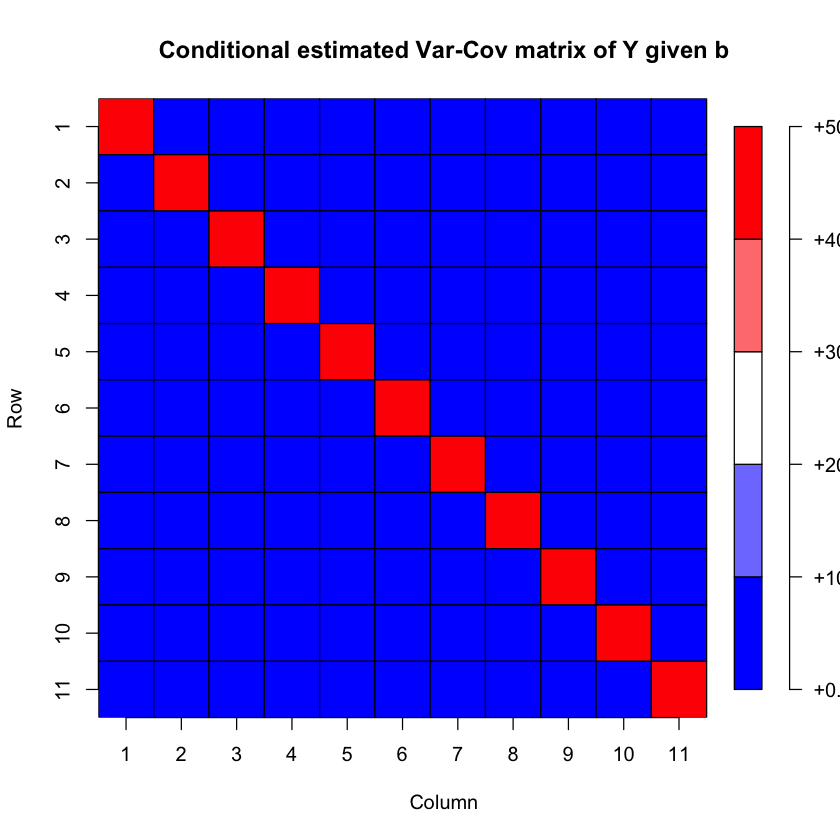

[1] 45.48487

[1] 121.0294

[1] 0.7268409

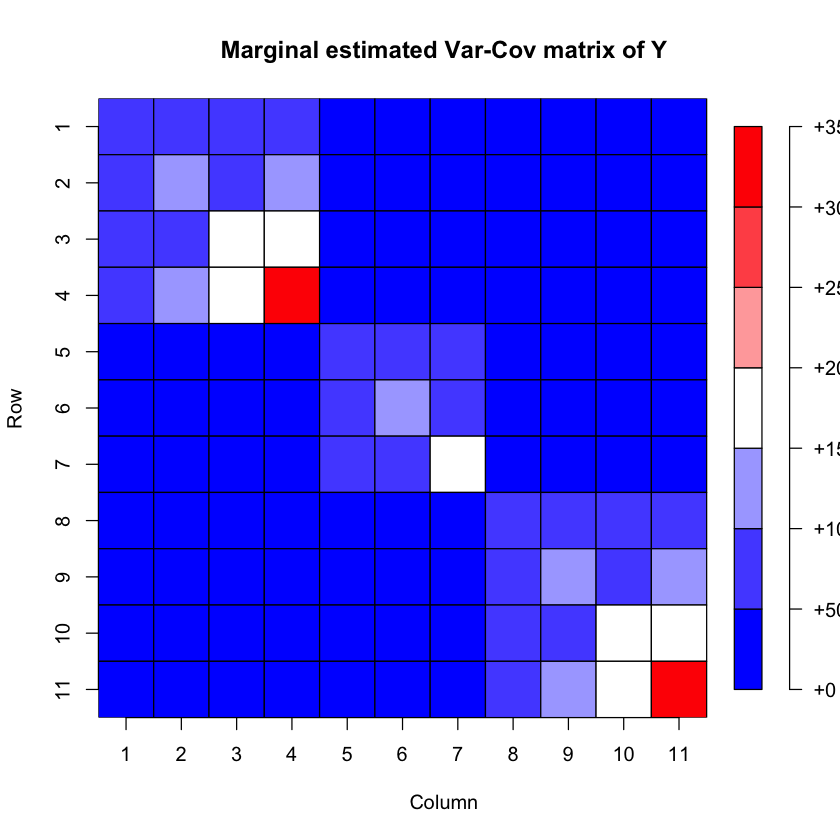

$subject


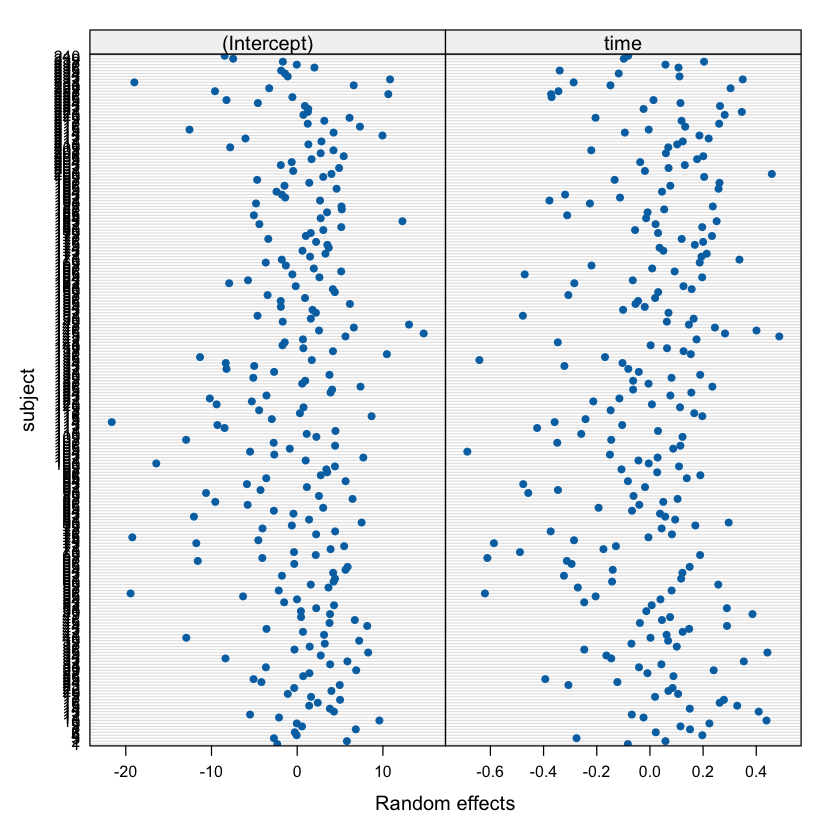

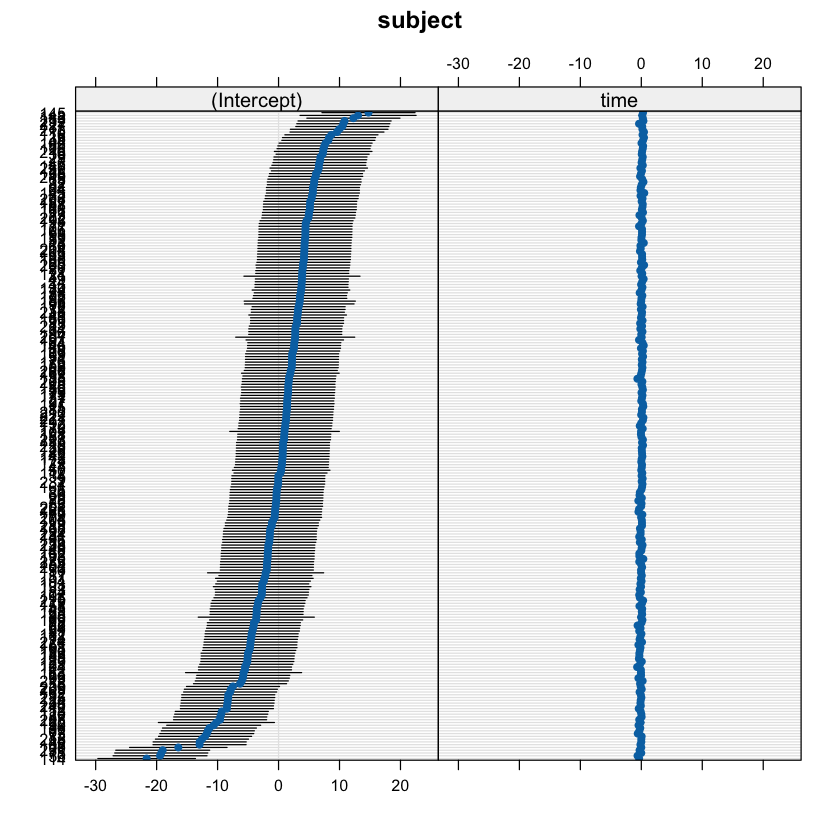

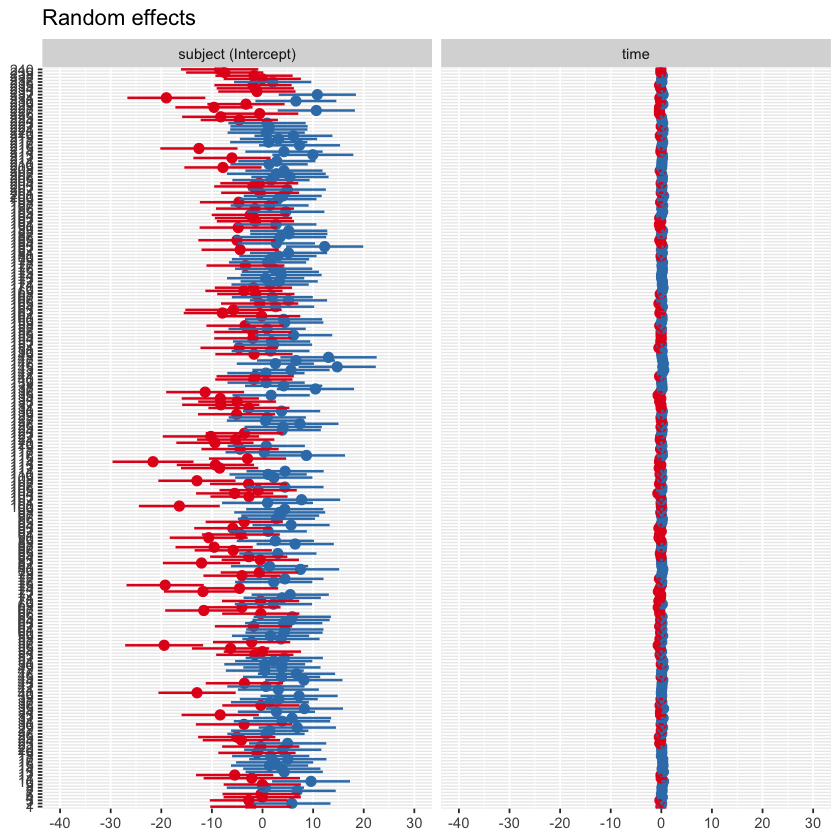

In [ ]:
#_______________________________________________________________________________
#### Model 2: random intercept + slope and homoscedastic residuals  (M16.2) ####

##### Model 2.A: general D (M16.2A) #####
#---------------------------------------#

fm16.2A <- lme(lm2.form, random = ~1 + time | subject, data = armd)

summary(fm16.2A)
intervals(fm16.2A)

# variance covariance matrix of the fixed effects
vcovb <- vcov(fm16.2A) 
vcovb
# and correlation
corb <- cov2cor(vcovb) 
nms <- abbreviate(names(fixef(fm16.2A)), 5)
rownames(corb) <- nms
corb

# Var-Cov matrix of random-effects and errors
print(vc <- VarCorr(fm16.2A), comp = c("Variance", "Std.Dev."))
sigma <- summary(fm16.2A)$sigma


# Let's compute the conditional and marginal var-cov matrix of Y
#---------------------------------------------------------------#
# the conditional variance-covariance matrix of Y (diagonal matrix)
getVarCov(fm16.2A,                     
          type = "conditional",       # sigma^2 * R_i
          individual = "2")   

# we extract sigma^2 * R_i for patients i=2,3,4
sR = getVarCov(fm16.2A, type = "conditional", individual = 2:4)
# and we plot them
plot(as.matrix(bdiag(sR$`2`, sR$`3`, sR$`4`)), 
     col=colorRampPalette(c("blue", "white", "red")),
     main = 'Conditional estimated Var-Cov matrix of Y given b')

# the marginal estimated variance-covariance matrix of Y (block-diagonal matrix)
(sVi = getVarCov(fm16.2A,                       
                type = "marginal",      # sigma^2 * V_i
                individual = "2"))
(cov2cor(sVi[[1]]))                     # Corr(sigma^2 * V_i) 

# we extract sigma^2 * V_i for patients i=2,3,4
sV <- getVarCov(fm16.2A, type = "marginal", individual = 2:4)
# and we plot them
plot(as.matrix(bdiag(sV$`2`, sV$`3`, sV$`4`)), 
     col=colorRampPalette(c("blue", "white", "red")),
     main = 'Marginal estimated Var-Cov matrix of Y')

     
# PVRE 
#-----#
# In this case the variance the mean random effect variance of the model is given by
# var_b = Var(b0,b1) = sigma2_b0 +  sigma2_b1 * mean(w^2) + 2 * Cov(b0,b1) * mean(w) 
# remember that Cov(b0,b1) = Cor(b0,b1) * sd(b0) * sd(b1)
# See equation (10) in Johnson (2014), Methods in Ecology and Evolution, 5(9), 944-946.

var_eps <- as.numeric(vc[3,1])
var_eps
var_b <- as.numeric(vc[1,1]) + as.numeric(vc[2,1])*mean(armd$time^2) + 
  + 2*as.numeric(vc[2,3])*as.numeric(vc[1,2])*as.numeric(vc[2,2])*mean(armd$time) 
var_b


PVRE <- var_b/(var_b+var_eps)
PVRE # 72% is very high!



# Visualization 
#-------------#
# visualization of the random intercepts & slopes with their 95% confidence intervals
# Random effects: b_0i, b_1i for i=1,...,234
plot(ranef(fm16.2A))


# as before, we can fit better plots through lmer()
fm16.2Amer <- lmer(visual ~ visual0 + time * treat.f + (1+time|subject), data = armd, 
                   control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=2e5)))
dotplot(ranef(fm16.2Amer))

# for a better visualization
plot_model(fm16.2Amer, type='re') #--> positive (blu) and negative (red) effect

In [25]:

# Comparing models 
#-----------------#
# The anova function, when given two or more arguments representing fitted models,
# produces likelihood ratio tests comparing the models.
anova(fm16.1, fm16.2A)
# The p-value for the test is essentially zero -> we prefer fm16.2A

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
fm16.1,"lme.formula(fixed = lm2.form, data = armd, random = ~1 | subject)",1,7,6591.971,6625.286,-3288.986,,NA,NA
fm16.2A,"lme.formula(fixed = lm2.form, data = armd, random = ~1 + time | subject)",2,9,6453.824,6496.657,-3217.912,1 vs 2,142.1469,1.35891e-31


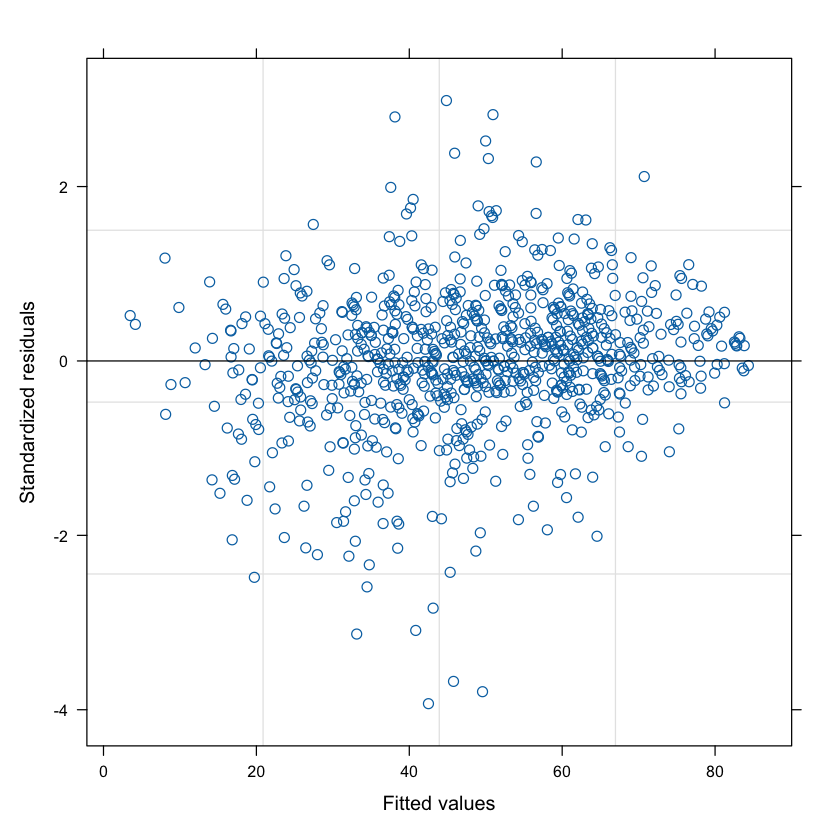

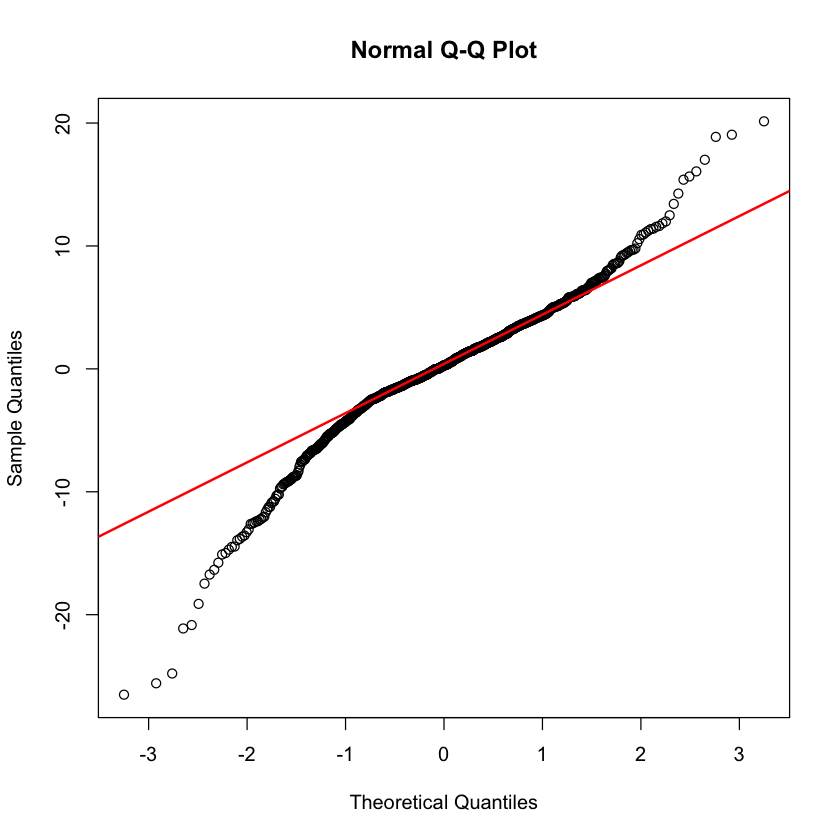

Approximate 95% confidence intervals

 Random Effects:
  Level: subject 
                           lower      est.     upper
sd((Intercept))        6.0367673 7.0666327 8.2721920
sd(time)               0.2328237 0.2729987 0.3201062
cor((Intercept),time) -0.1064165 0.1431946 0.3758275

 Within-group standard error:
   lower     est.    upper 
6.295547 6.744247 7.224927 

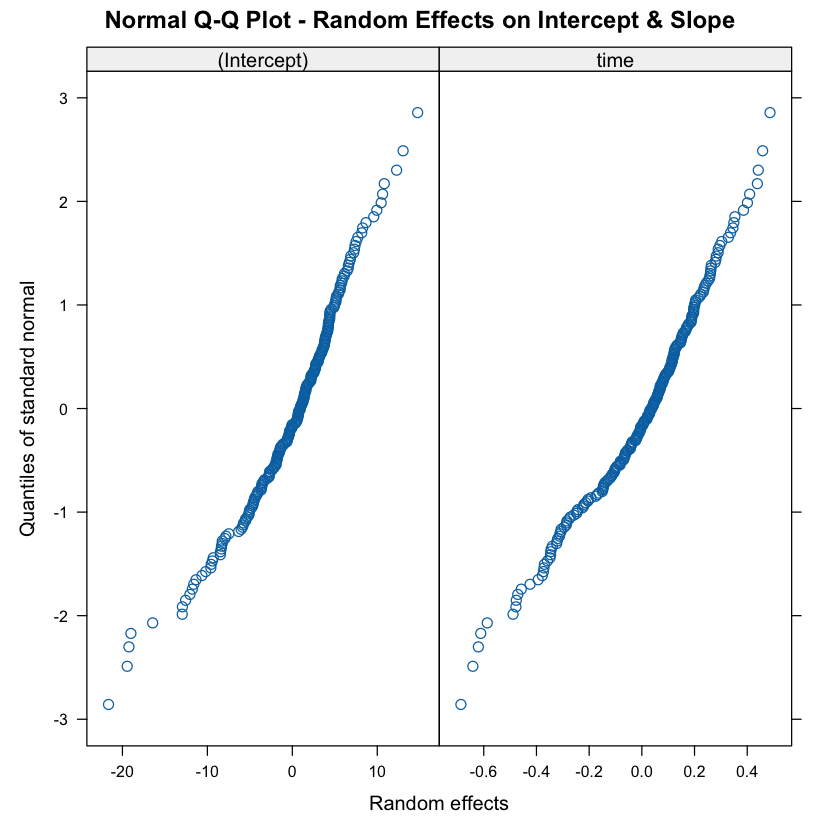

In [26]:

# Diagnostic plots
#-----------------#
# 1) Assessing Assumption on the within-group errors
plot(fm16.2A)

par(bg = "white")   
qqnorm(resid(fm16.2A))
qqline(resid(fm16.2A), col='red', lwd=2)

# 2) Assessing Assumption on the Random Effects
qqnorm(fm16.2A, ~ranef(.), main='Normal Q-Q Plot - Random Effects on Intercept & Slope')



intervals(fm16.2A, which = "var-cov")
# We observed that the 95% CI for correlation between sigma^2*d_11 and sigma^2*d_22 id contains 0 --> 
# --> they can be uncorrelated
# --> we fit a new model with a diagonal D matrix 


Approximate 95% confidence intervals

 Fixed effects:
                        lower        est.       upper
(Intercept)         0.7681783  5.34878605  9.92939375
visual0             0.8209982  0.89846464  0.97593107
time               -0.2787353 -0.21537034 -0.15200540
treat.fActive      -4.6973319 -2.31374297  0.06984594
time:treat.fActive -0.1475370 -0.05505951  0.03741799

 Random Effects:
  Level: subject 
                    lower      est.     upper
sd((Intercept)) 6.4146405 7.3534358 8.4296257
sd(time)        0.2434845 0.2817034 0.3259215

 Within-group standard error:
   lower     est.    upper 
6.254509 6.683358 7.141611 

Linear mixed-effects model fit by REML
  Data: armd 
       AIC      BIC    logLik
  6453.137 6491.211 -3218.568

Random effects:
 Formula: ~time | subject
 Structure: Diagonal
        (Intercept)      time Residual
StdDev:    7.353436 0.2817034 6.683358

Fixed effects:  list(lm2.form) 
                       Value Std.Error  DF   t-value p-value
(Intercept)         5.348786 2.3326049 631  2.293053  0.0222
visual0             0.898465 0.0393173 231 22.851612  0.0000
time               -0.215370 0.0322676 631 -6.674501  0.0000
treat.fActive      -2.313743 1.2097676 231 -1.912552  0.0570
time:treat.fActive -0.055060 0.0470928 631 -1.169171  0.2428
 Correlation: 
                   (Intr) visul0 time   trt.fA
visual0            -0.932                     
time               -0.101  0.003              
treat.fActive      -0.277  0.025  0.190       
time:treat.fActive  0.069 -0.001 -0.685 -0.280

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Ma

,(Intercept),visual0,time,treat.fActive,time:treat.fActive
(Intercept),5.441045673,-8.546291e-02,-7.584269e-03,-0.782742758,7.547327e-03
visual0,-0.085462910,1.545853e-03,3.223389e-06,0.001203516,-2.555193e-06
time,-0.007584269,3.223389e-06,1.041200e-03,0.007408572,-1.041199e-03
treat.fActive,-0.782742758,1.203516e-03,7.408572e-03,1.463537581,-1.594417e-02
time:treat.fActive,0.007547327,-2.555193e-06,-1.041199e-03,-0.015944169,2.217728e-03


,(Intercept),visual0,time,treat.fActive,time:treat.fActive
(Int),1.0000000,-0.931863603,-0.100764009,-0.27738050,0.06870650
visl0,-0.9318636,1.000000000,0.002540748,0.02530263,-0.00138002
time,-0.1007640,0.002540748,1.000000000,0.18978658,-0.68519212
trt.A,-0.2773805,0.025302632,0.189786579,1.00000000,-0.27986320
tm:.A,0.0687065,-0.001380020,-0.685192120,-0.27986320,1.00000000


subject = pdDiag(time) 
            Variance    StdDev   
(Intercept) 54.07301791 7.3534358
time         0.07935681 0.2817034
Residual    44.66726927 6.6833576


[1] 6.683358

subject 2 
Conditional variance covariance matrix
       1      2      3      4
1 44.667  0.000  0.000  0.000
2  0.000 44.667  0.000  0.000
3  0.000  0.000 44.667  0.000
4  0.000  0.000  0.000 44.667
  Standard Deviations: 6.6834 6.6834 6.6834 6.6834 

subject 2 
Marginal variance covariance matrix
        1       2       3       4
1 100.010  57.882  61.691  70.579
2  57.882 110.170  76.928 103.590
3  61.691  76.928 144.450 153.110
4  70.579 103.590 153.110 313.320
  Standard Deviations: 10 10.496 12.019 17.701 

,1,2,3,4
1,1.0000000,0.5514369,0.5132672,0.3987130
2,0.5514369,1.0000000,0.6098143,0.5575745
3,0.5132672,0.6098143,1.0000000,0.7196994
4,0.3987130,0.5575745,0.7196994,1.0000000


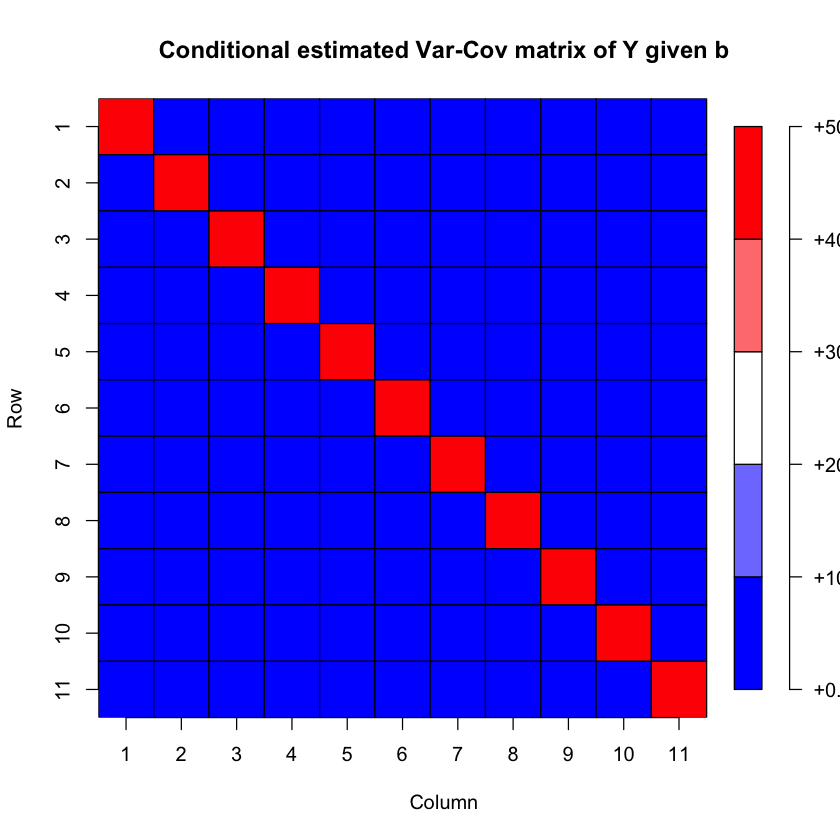

subject = pdDiag(time) 
            Variance    StdDev   
(Intercept) 54.07301791 7.3534358
time         0.07935681 0.2817034
Residual    44.66726927 6.6833576

[1] 44.66727

[1] 116.9478

[1] 0.7236194

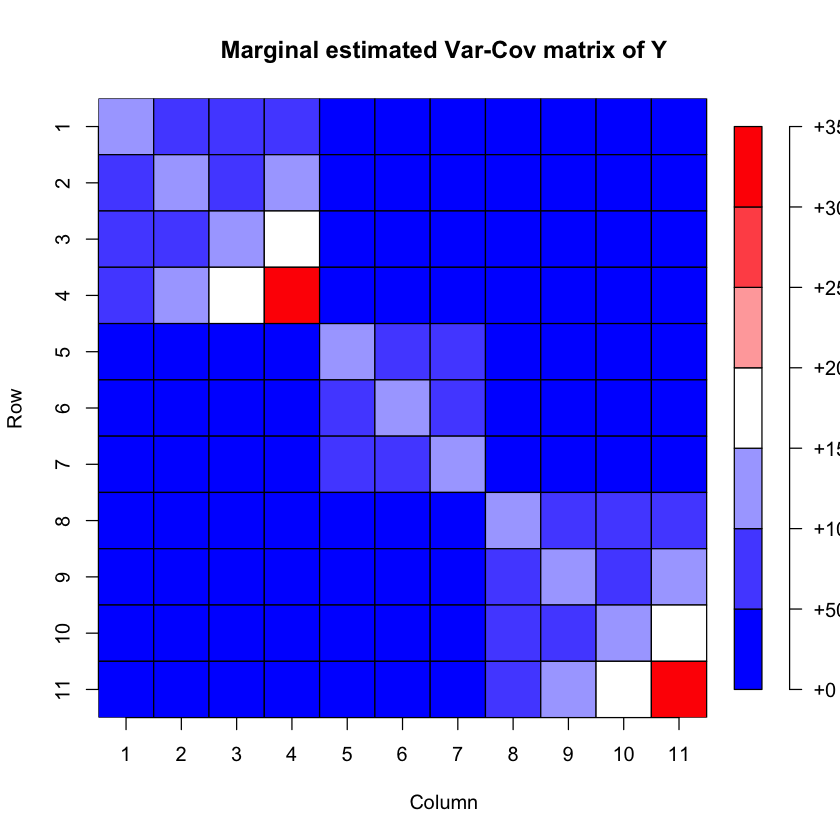

$subject


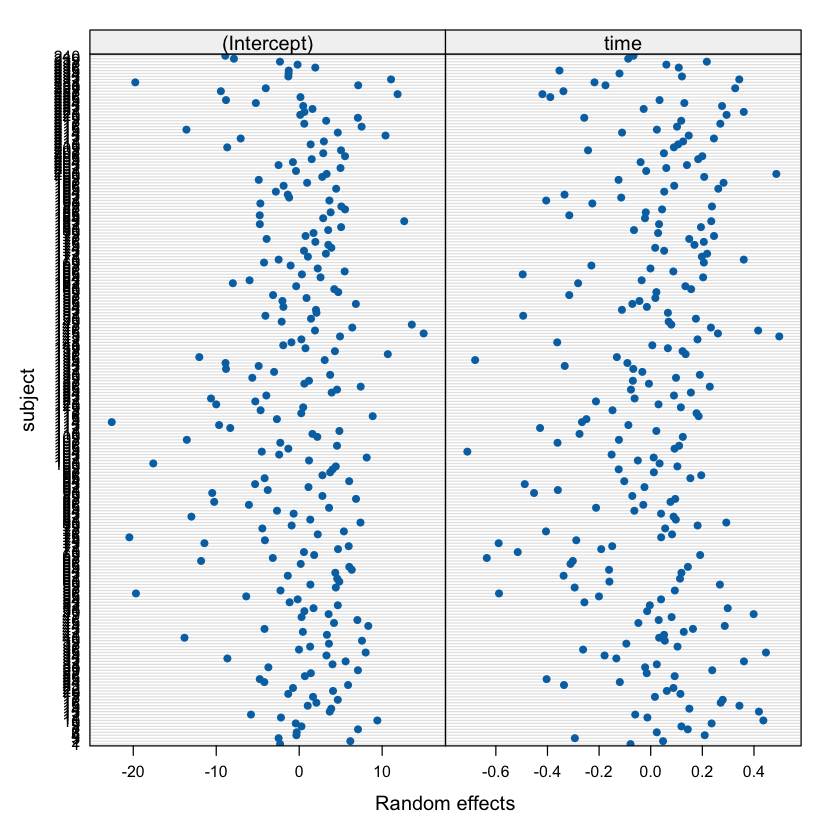

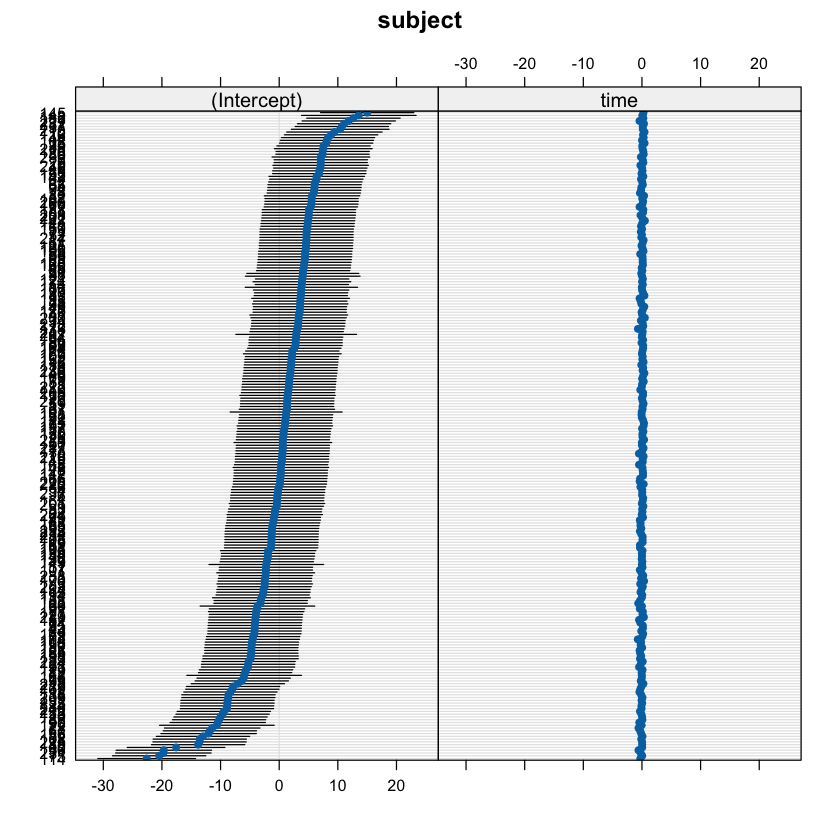

In [29]:

#_______________________________________________________________________________
##### Model 2.B: diagonal D (M16.2B) ######
#-------------------------------------------------------------------------------#

fm16.2B <- lme(lm2.form, random = list(subject = pdDiag(~time)), data = armd) 
# Diagonal D (diagonal positive-definite matrix)

intervals(fm16.2B)                       # 95% CI for betas, sigma  

summary(fm16.2B)

vcovb <- vcov(fm16.2B) 
vcovb
corb <- cov2cor(vcovb) 
nms <- abbreviate(names(fixef(fm16.2B)), 5)
rownames(corb) <- nms
corb

# Var-Cov matrix of random-effects and residuals
print(vc <- VarCorr(fm16.2B), comp = c("Variance", "Std.Dev."))


sigma <- summary(fm16.2B)$sigma
sigma


# Let's compute the conditional and marginal var-cov matrix of Y
#---------------------------------------------------------------#
# the conditional variance-covariance matrix of Y (diagonal matrix)
getVarCov(fm16.2B,                     
          type = "conditional",       # sigma^2 * R_i
          individual = "2")   
# Conditioned to the random effects b_i, we observe the var-cov of the errors
# that are independent and homoscedastic

# we extract sigma^2 * R_i for patients i=2,3,4
sR = getVarCov(fm16.2B, type = "conditional", individual = 2:4)
# and we plot them
plot(as.matrix(bdiag(sR$`2`, sR$`3`, sR$`4`)), 
     col=colorRampPalette(c("blue", "white", "red")),
     main = 'Conditional estimated Var-Cov matrix of Y given b')

# the marginal variance-covariance matrix of Y (block-diagonal matrix)
(sVi = getVarCov(fm16.2B,                       
                type = "marginal",      # sigma^2 * V_i
                individual = "2"))
(cov2cor(sVi[[1]]))                     # Corr(sigma^2 * V_i) 

# we extract sigma^2 * V_i for patients i=2,3,4
sV <- getVarCov(fm16.2B, type = "marginal", individual = 2:4)
# and we plot it
plot(as.matrix(bdiag(sV$`2`, sV$`3`, sV$`4`)), 
     col=colorRampPalette(c("blue", "white", "red")),
     main = 'Marginal estimated Var-Cov matrix of Y')


# PVRE
#-----#
# In this case the variance of random effects represents the mean random 
# effect variance of the model and is given by
# var_b = Var(b0,b1) = sigma2_b0 + 0 + sigma2_b1*mean(z^2)
# See equation (10) in Johnson (2014), Methods in Ecology and Evolution, 5(9), 944-946.
vc
var_eps <- as.numeric(vc[3,1])
var_eps
var_b <- as.numeric(vc[1,1]) + mean(armd$time^2)*as.numeric(vc[2,1]) # 54.07117 + 0.07935904*mean(armd$time^2) 
var_b

PVRE <- var_b/(var_b+var_eps)
PVRE # 72% is very high!


# Visualization
#--------------#
# visualization of the random intercepts with their 95% confidence intervals
# Random effects: b_0i, b_1i for i=1,...,234
plot(ranef(fm16.2B))

# for a better visualization
fm16.2Bmer <- lmer(visual ~ visual0 + time * treat.f + (1|subject) + (0 + time|subject),
                   data = armd, control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=2e5)))
dotplot(ranef(fm16.2Bmer))


In [30]:
# Test for (variance of) random slopes
#-------------------------------------#
# Auxiliary model with random slopes only. 
mAux <- update(fm16.1, random = ~ 0 + time|subject, data = armd)  

exactRLRT(m = mAux,      # Auxiliary model (the reduced model containing only the random effect to be tested)
          m0 = fm16.1,   # M16.1  (null)
          mA = fm16.2B)  # M16.2B (alternative)

# The simulated p-value is essentially 0
# indicating that null hypothesis can be rejected that the variance of random slopes is equal to 0.


	simulated finite sample distribution of RLRT.
	
	(p-value based on 10000 simulated values)

data:  
RLRT = 140.83, p-value < 2.2e-16


In [28]:
# exactRLRT() function allows ONLY for Independent Random Effects.
# -->  we illustrate the use of the function for model M16.2B with a diagonal matrix D. (not for M16.2A)
# Because we consider a model with two variance components,
# i.e., random intercepts and random slopes, we need to specify all three arguments
# m, m0, and mA of the function exactRLRT()

?exactRLRT

exactRLRT                package:RLRsim                R Documentation

_R_e_s_t_r_i_c_t_e_d _L_i_k_e_l_i_h_o_o_d _R_a_t_i_o _T_e_s_t_s _f_o_r _a_d_d_i_t_i_v_e _a_n_d _l_i_n_e_a_r _m_i_x_e_d _m_o_d_e_l_s

_D_e_s_c_r_i_p_t_i_o_n:

     This function provides an (exact) restricted likelihood ratio test
     based on simulated values from the finite sample distribution for
     testing whether the variance of a random effect is 0 in a linear
     mixed model with known correlation structure of the tested random
     effect and i.i.d. errors.

_U_s_a_g_e:

     exactRLRT(
       m,
       mA = NULL,
       m0 = NULL,
       seed = NA,
       nsim = 10000,
       log.grid.hi = 8,
       log.grid.lo = -10,
       gridlength = 200,
       parallel = c("no", "multicore", "snow"),
       ncpus = 1L,
       cl = NULL
     )
     
_A_r_g_u_m_e_n_t_s:

       m: The fitted model under the alternative or, for test